In [2]:
import numpy as np
import pandas as pd
import shap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape

# Load the dataset

For a matter of example, we take a simple datahset on the price of California Houses, 

In [3]:
df = fetch_california_housing(as_frame=True)
X = df['data']
y = df['target']

# Prepare the data and fit the model

We will use the default features. You can try to engineer more features and to see how it impacts the performance.

We also fit a Random Forest model because it usually gives a good prediction baesline out-of-the-box.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Create an explainer object and calculate SHAP values for the test set

In [7]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 4129it [10:08,  6.68it/s]                          


# Check the most important features by the absolute value based on SHAP

In [9]:
# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame(list(zip(X.columns, np.abs(shap_values.values).mean(axis=0))), 
                                   columns=['Feature', 'Mean Absolute SHAP Value'])
important_features = feature_importance.sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display important features
print(important_features)

      Feature  Mean Absolute SHAP Value
0      MedInc                  0.479333
6    Latitude                  0.379086
7   Longitude                  0.289726
5    AveOccup                  0.224661
1    HouseAge                  0.070559
2    AveRooms                  0.054463
3   AveBedrms                  0.028437
4  Population                  0.019281


# Specify the number of selected features and re-fit the model

We will try and select the TOP 5 features and see how the performance of the model goes. Ideally, we want to have a similar performance to the model with all the features.

In [10]:
# Number of top features to select
n_top_features = 5  # You can adjust this number based on your needs

# Select top N important features
selected_features = important_features['Feature'].head(n_top_features).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the Random Forest model with selected features
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

# Compare the model performance with all and selected features

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the test set with selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate performance metrics
mape_before = mape(y_test, y_pred) * 100
mape_after = mape(y_test, y_pred_selected) * 100
print(f"MAPE Before: {mape_before:.2f} %")
print(f"MAPE After: {mape_after:.2f} %")

MAPE Before: 18.92 %
MAPE After: 18.25 %


We see the performance is very similar and now we are using less features.

# Check summary plot if feature relations to the target make sense

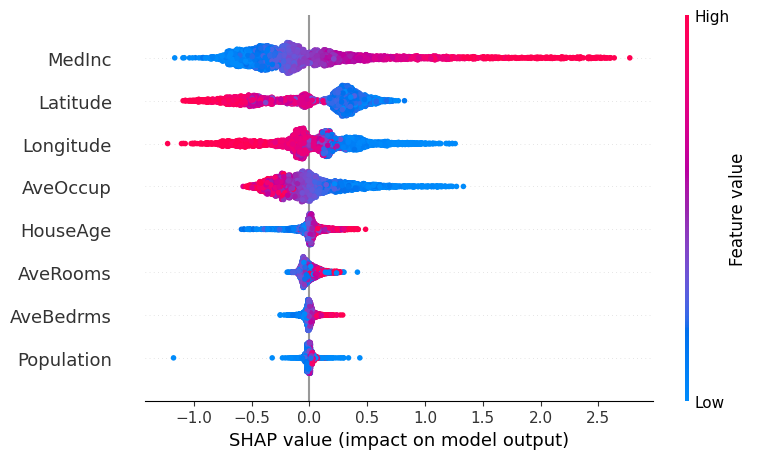

In [12]:
shap.summary_plot(shap_values, X_test)

We see that higher household Median Income corresponds to the increase in the house price.

We also see that the location of the house places an important role.

There are other nice plots to try in SHAP, do that for sure!